In [41]:
import os
import cv2
import matplotlib.pyplot as plt
import warnings
import logging

logging.basicConfig(level=logging.ERROR)

def load_and_preprocess_images(dataset_dir):
    processed_images = []
    for person_id in os.listdir(dataset_dir):
        if person_id == '.DS_Store':
            continue
        person_path = os.path.join(dataset_dir, person_id, 'Hand')
        # print(person_path)
        if os.path.isdir(person_path):
                for hand_side in ['Right']:
                    hand_path = os.path.join(person_path, hand_side)
                    # print(hand_path)
                    if os.path.isdir(hand_path):
                        for image_name in os.listdir(hand_path):
                            if image_name == '.DS_Store':
                                continue
                            image_path = os.path.join(hand_path, image_name)
                            # print(image_path)
                            processed_image = preprocess_image(image_path)
                            if processed_image is not None:
                                # print(processed_image)
                                processed_images.append((person_id, hand_side, image_name, processed_image))
                            else:
                                print(f"Failed to process image: {image_path}")
    return processed_images


def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Image not found or unreadable: {image_path}")
            return None
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        _, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
        return binary
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


Corrupt JPEG data: premature end of data segment


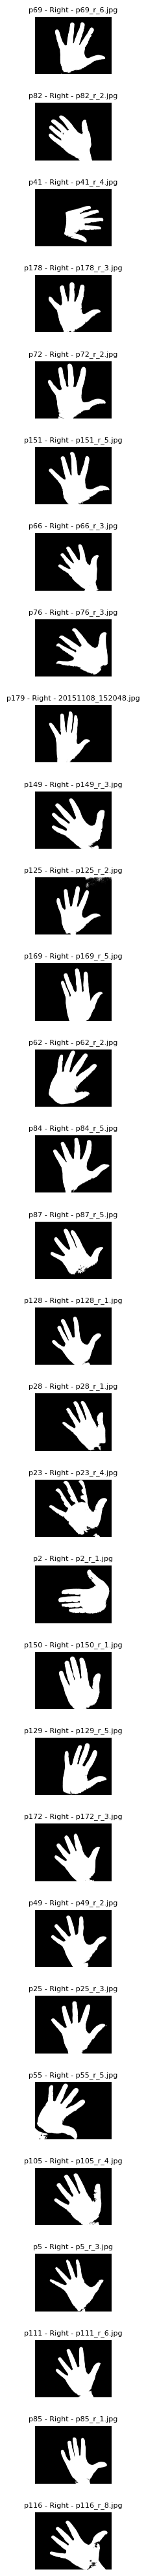

In [42]:
import config

dataset_dir = config.DATASET_DIR
if not dataset_dir:
    raise ValueError("Dataset directory is not set")

processed_images = load_and_preprocess_images(dataset_dir)

if processed_images:
    plt.figure(figsize=(15, 40))
    person_ids = set([item[0] for item in processed_images])  # Unique person IDs
    persons_to_show = list(person_ids)[:30]  # Select the first 20 people

    for i, person_id in enumerate(persons_to_show):
        right_image = None
        for item in processed_images:
            if item[0] == person_id:
                right_image = item
                break
        
        if right_image:
            plt.subplot(30, 1, i + 1)
            plt.title(f'{right_image[0]} - Right - {right_image[2]}', fontsize=8)
            plt.imshow(right_image[3], cmap='gray')
            plt.axis('off')

    plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
    plt.show()
else:
    print("No images found or preprocessed.")

In [43]:
def extract_geometric_features(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(image)
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)
    
    return contour_image

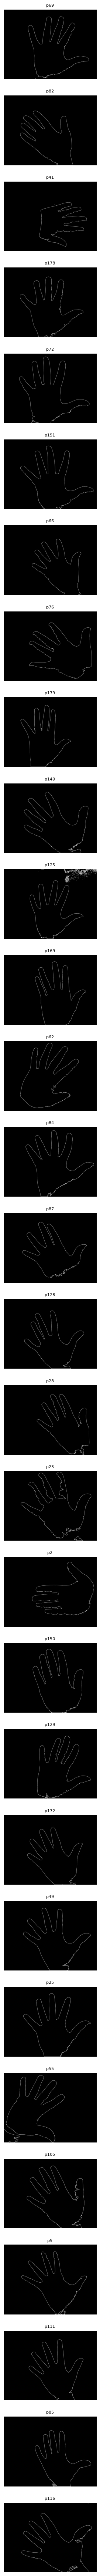

In [44]:
processed_images_with_contours = []

for person_id, hand_side, image_name, processed_image in processed_images:
    contour_image = extract_geometric_features(processed_image)
    if contour_image is not None:
        processed_images_with_contours.append((person_id, hand_side, image_name, contour_image))

if processed_images_with_contours:
    plt.figure(figsize=(50, 70))
    person_ids = set([item[0] for item in processed_images_with_contours])  # Unique person IDs
    persons_to_show = list(person_ids)[:30]  # Select the first 30 people

    for i, person_id in enumerate(persons_to_show):
        right_image_data = None
        for item in processed_images_with_contours:
            if item[0] == person_id and item[1] == 'Right':
                right_image_data = item
                break

        if right_image_data:
            plt.subplot(30, 1, i + 1)
            plt.title(f'{right_image_data[0]}', fontsize=8)
            plt.imshow(right_image_data[3], cmap='gray')
            plt.axis('off')

    plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
    plt.show()
else:
    print("No images found or preprocessed.")